# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

# 2. Carregando o dataframe cotahist_med_new.CSV
    Arquivo com histórico de ações <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)
     

In [2]:
df_acoes = pd.read_csv('cotahist_med_new.csv')
pd.set_option('display.max_columns', None)


# Tarefa 1

### 1. Gerar Dataframes com máximo, mínimo, média, mediana, desvio padrão e fazer um merge com o DataFrame do histórico com médias estocasticas de 13, 21 e 26 dias.


In [3]:
# Buscar campos importantes
df_acoes_filtrada = df_acoes[['Data_Cot', 'Cod_Papel','Preco_Aber', 'Preco_Max',
                               'Preco_Min', 'Preco_Med', 'Preco_Ult','Quantidade_Tot', 'Volume_Tot','Media_MME_13',
                               'Media_MME_21','Media_MME_26','Media_50']].copy()

#Criação de dataframe com estatisticas
#df_acoes_estatistica = df_acoes_filtrada.groupby('Cod_Papel')['Preco_Ult'].agg([('Média','mean'),('Máximo','max'),
#                                                                ('Mínimo','min'),('Mediana','mean'),('Desv_Padrao','std'),
#                                                                ('Preço','last'),('Quartil','quantile')])

df_acoes_estatistica = df_acoes_filtrada.groupby('Cod_Papel')['Preco_Ult'].describe()

#print(df_acoes_estatistica.head())
#criação de Dataframe com dados do dia anterior das ações.
data_filtro = df_acoes_filtrada['Data_Cot'][len(df_acoes_filtrada)-1]
df_acoes_dia = df_acoes_filtrada[df_acoes_filtrada['Data_Cot']==data_filtro]
#print(df_acoes_dia.head())

#Criação do novo dataframe com todas as informações necessárias
df_acoes_new = df_acoes_estatistica.join(df_acoes_dia.set_index('Cod_Papel'), on='Cod_Papel')
df_acoes_new.dropna(inplace=True)
df_acoes_new.reset_index(inplace=True)
df_acoes_new['Ranking'] = ( df_acoes_new['Preco_Ult'] / df_acoes_new['50%'] ) * 100
df_acoes_new[df_acoes_new['Cod_Papel']=='PSSA3       ']

,Cod_Papel,count,mean,std,min,25%,50%,75%,max,Data_Cot,Preco_Aber,Preco_Max,Preco_Min,Preco_Med,Preco_Ult,Quantidade_Tot,Volume_Tot,Media_MME_13,Media_MME_21,Media_MME_26,Media_50,Ranking
257,PSSA3,619.0,45.479596,13.904071,18.7,43.575,49.46,53.97,67.8,20220506.0,20.07,20.35,19.9,20.07,19.98,947400.0,19017698.0,20.41,21.07,20.56,20.54,40.39628


In [4]:
df = df_acoes_filtrada[['Cod_Papel','Data_Cot','Preco_Ult']].copy()

df_acoes_estatistica_1 = df.groupby('Cod_Papel')['Cod_Papel','Data_Cot','Preco_Ult'].tail(3)
novo = df_acoes_estatistica_1.to_csv('Arquivo',index=False)
#df_acoes_estatistica_1
df_acoes_estatistica_2 = pd.read_csv('Arquivo')
df_acoes_estatistica_2['Cod_Papel'][4]
d =df_acoes_estatistica_2.groupby(['Cod_Papel','Data_Cot'],dropna = True)['Preco_Ult'].aggregate('mean').unstack()
d 
#new = df_acoes_estatistica_1.pivot_table(values='Preco_Ult', index='Cod_Papel', columns='Data_Cot')
#print(new)

C:\Users\br0hg\AppData\Local\Temp/ipykernel_13912/201076040.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acoes_estatistica_1 = df.groupby('Cod_Papel')['Cod_Papel','Data_Cot','Preco_Ult'].tail(3)


Data_Cot,20191107,20191108,20191111,20191122,20191125,20191126,20191210,20191211,20191212,20191213,20191216,20191217,20191226,20191227,20191230,20200226,20200227,20200228,20200424,20200427,20200428,20200603,20200604,20200605,20200630,20200701,20200702,20200708,20200709,20200710,20200924,20200925,20200928,20201007,20201008,20201009,20201118,20201119,20201120,20201209,20201210,20201211,20201228,20201229,20201230,20210303,20210304,20210305,20210324,20210325,20210326,20210329,20210330,20210422,20210503,20210506,20210512,20210513,20210514,20210527,20210601,20210602,20210604,20210607,20210608,20210609,20210610,20210616,20210618,20210621,20210622,20210623,20210624,20210625,20210628,20210629,20210712,20210714,20210715,20210716,20210720,20210728,20210729,20210730,20210802,20210803,20210804,20210805,20210811,20210812,20210813,20210816,20210817,20210818,20210908,20210909,20210910,20210914,20210915,20210916,20210917,20210920,20210921,20210922,20210928,20211014,20211019,20211020,20211021,20211022,20211025,20211027,20211105,20211111,20211117,20211118,20211119,20211122,20211124,20211126,20211129,20211201,20211203,20211206,20211207,20211213,20211215,20211216,20211221,20211222,20211223,20211227,20211228,20211229,20211230,20220103,20220104,20220105,20220110,20220111,20220117,20220119,20220120,20220121,20220124,20220131,20220201,20220202,20220203,20220209,20220210,20220211,20220216,20220223,20220224,20220302,20220303,20220304,20220307,20220308,20220309,20220310,20220311,20220314,20220315,20220316,20220317,20220318,20220321,20220322,20220323,20220324,20220325,20220328,20220329,20220330,20220331,20220401,20220404,20220405,20220406,20220407,20220408,20220411,20220412,20220413,20220414,20220418,20220419,20220420,20220425,20220426,20220427,20220428,20220429,20220502,20220503,20220504,20220505,20220506
Cod_Papel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AALR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.79,19.71,19.74
ABCB4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.44,15.77,15.79
ABEV3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 2. Selecionando Ações Interessantes para se trabalhar.

In [5]:
df_acao_selected =  df_acoes_new[(df_acoes_new['Volume_Tot']>2000000) &
                                 (df_acoes_new['Data_Cot']> 20210401) &
                                 (df_acoes_new['Preco_Ult'] < df_acoes_new['25%']) &
                                 (df_acoes_new['Media_MME_13'] < df_acoes_new['Preco_Ult']) &
                                 (df_acoes_new['Media_MME_21'] > df_acoes_new['Preco_Ult']) &
                                 (df_acoes_new['Media_MME_26'] > df_acoes_new['Preco_Ult'])].copy()

#df_acao_selected =  df_acoes_new[(df_acoes_new['Volume_Tot']>2000000) &
#                                 (df_acoes_new['Preco_Ult'] < df_acoes_new['25%'])&
#                                 (df_acoes_new['Media_MME_13'] < df_acoes_new['Preco_Ult']) ].copy()


df_acao_selected.sort_values(by='Ranking')


,Cod_Papel,count,mean,std,min,25%,50%,75%,max,Data_Cot,Preco_Aber,Preco_Max,Preco_Min,Preco_Med,Preco_Ult,Quantidade_Tot,Volume_Tot,Media_MME_13,Media_MME_21,Media_MME_26,Media_50,Ranking
10,ALPA4,616.0,36.796834,9.571748,17.60,29.10,36.100,41.6125,61.22,20220506.0,19.70,21.59,19.56,20.99,21.23,7233100.0,151835589.0,20.90,22.34,22.08,23.71,58.808864
303,SYNE3,162.0,9.006481,3.017177,5.52,6.70,7.205,11.5750,16.84,20220506.0,6.03,6.12,5.88,6.02,6.00,991600.0,5975222.0,5.88,6.18,6.08,6.45,83.275503
295,SOJA3,256.0,14.454414,0.839640,12.49,13.94,14.300,15.0000,16.88,20220506.0,12.90,13.28,12.79,12.99,13.06,363500.0,4723350.0,12.97,13.48,13.17,13.78,91.328671


### 3. Grafico das Ações Selecionadas

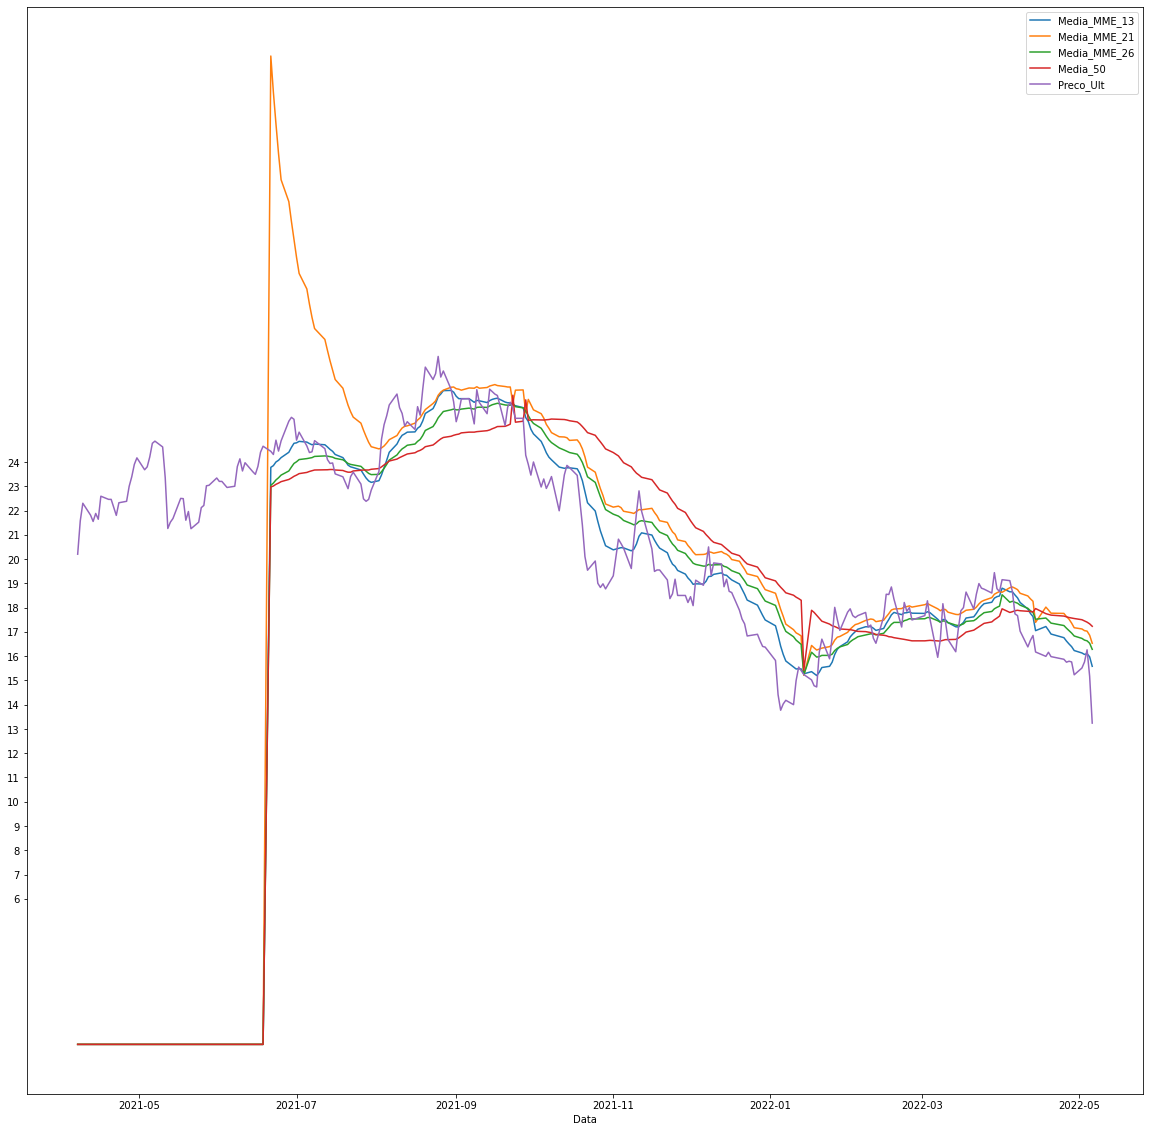

In [6]:
def converte_data (data_raw):
    data_raw = str(data_raw)
    data_transf = data_raw[0:4] + '-' + data_raw[4:6]+ '-' + data_raw[6:8]   
    data_transf = datetime.strptime(data_transf, '%Y-%m-%d').date()
    return(data_transf)

acoes = df_acoes_filtrada.copy()

sel_acao = 'PETZ3       '
acao = acoes[acoes['Cod_Papel']== sel_acao]
#acao = acao[(acao['Data_Cot']>20211115) & (acao['Data_Cot']<20220426)]
acao = acao[['Data_Cot', 'Cod_Papel','Preco_Aber', 'Preco_Max',
       'Preco_Min', 'Preco_Med', 'Preco_Ult','Quantidade_Tot', 'Volume_Tot','Media_MME_13','Media_MME_21','Media_MME_26','Media_50']]
acao= acao.copy(deep=True)
data_cot =[]
acao.reset_index(inplace=True)

for i in range (0,len(acao)):
    nova_data = converte_data(acao['Data_Cot'][i])
    data_cot.append(nova_data)
acao['Data']= data_cot
acao.drop(['Data_Cot','index'], axis=1, inplace=True)
acao.set_index('Data',inplace=True)
acao = acao[['Media_MME_13','Media_MME_21','Media_MME_26','Media_50','Preco_Ult']]
#print(acao.describe())
eixo_y=[]
#eixo_y.append(8)
#for z in range(600,4200,50:
for z in range(600,2440,100):
    z_eixo = z/100
    eixo_y.append(z_eixo)
#print(eixo_y)

acao.plot(figsize=[20,20],)
plt.yticks(eixo_y)
plt.show()


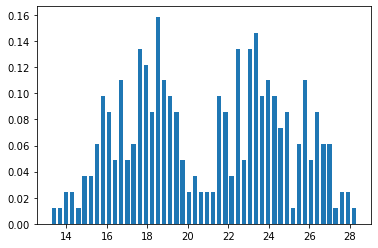

In [7]:
acao_hist = acoes[acoes['Cod_Papel']== sel_acao]
#acao = acao[(acao['Data_Cot']>20220101) & (acao['Data_Cot']<20220401)]
acao_hist = acao_hist[['Preco_Ult']]
#acao_hist.hist_plot(figsize=[15,5],)
plt.hist(acao_hist, density=True, bins=50,rwidth=0.7) 
#plt.hist(values, rwidth=0.7) 

plt.show()

In [8]:
bins=[]
for i in range(0,60,1):
    bins.append(i*1)
#bins= bins*0.2
hist, bins =np.histogram(acao_hist[['Preco_Ult']], bins )  

                                 
    
#print (hist)   
#print (bins)  
for x in range(0,59,1):
    print(str(round(bins[x],2)) + ' ' + str(hist[x]))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 2
14 7
15 19
16 19
17 26
18 33
19 19
20 8
21 17
22 20
23 36
24 23
25 16
26 18
27 7
28 1
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0


In [9]:
df_1 = df_acoes_filtrada[df_acoes_filtrada['Cod_Papel']== sel_acao] ##(df_acoes_filtrada['Data_Cot']> 20220316)]

df_1.reset_index(inplace=True)
len(df_1)
#print(df_1['Preco_Ult'].quantile(0.50))
#print(df_1['Preco_Ult'])
df_1.tail(10)

#df_1[['Data_Cot','Media_MME_13','Media_MME_21','Media_MME_26','Media_50','Preco_Ult']]
#teste = teste[teste['Data_Cot']> 20220316]              
#teste      

,index,Data_Cot,Cod_Papel,Preco_Aber,Preco_Max,Preco_Min,Preco_Med,Preco_Ult,Quantidade_Tot,Volume_Tot,Media_MME_13,Media_MME_21,Media_MME_26,Media_50
261,132218,20220425,PETZ3,15.04,15.98,15.01,15.72,15.87,7376500,116002585.0,16.76,17.76,17.26,17.65
262,132219,20220426,PETZ3,16.00,16.10,15.52,15.80,15.75,7239900,114448622.0,16.62,17.63,17.15,17.62
263,132220,20220427,PETZ3,16.13,16.27,15.66,15.92,15.79,5003100,79650026.0,16.50,17.52,17.05,17.59
264,132221,20220428,PETZ3,15.79,16.05,15.36,15.74,15.76,6392400,100659050.0,16.39,17.36,16.95,17.57
265,132222,20220429,PETZ3,15.95,16.15,15.20,15.52,15.23,7972400,123759072.0,16.23,17.17,16.83,17.55
266,132223,20220502,PETZ3,15.22,15.51,14.91,15.24,15.51,7102300,108297642.0,16.13,17.12,16.73,17.50
267,132224,20220503,PETZ3,15.44,16.27,15.33,15.92,15.76,12764400,203254954.0,16.07,17.05,16.66,17.45
268,132225,20220504,PETZ3,15.54,16.39,15.03,15.69,16.26,8232000,129178137.0,16.10,17.03,16.63,17.40
269,132226,20220505,PETZ3,15.94,15.99,15.03,15.33,15.17,5489000,84179274.0,15.97,16.86,16.53,17.33
270,132227,20220506,PETZ3,15.15,15.15,12.88,13.54,13.24,37968900,514396587.0,15.58,16.53,16.28,17.23


In [10]:
df_1['Preco_Ult'].quantile(0.50)

21.4

In [11]:
#Definição de outliers

#Método do Quartil
q1=df_1['Preco_Ult'].quantile(0.25)
q3=df_1['Preco_Ult'].quantile(0.75)
iqr = q3-q1
lim_inf= q1 - (iqr * 1.5)
lim_sup= q1 + (iqr * 1.5)
print(f'primeiro quartil = {round(q1,2)} e terceiro = {round(q3,2)}')
print('Método Quartil')
print(f'Limite inferior = {round(lim_inf,2)} e limite superior = {round(lim_sup,2)}')

#método do desvio padrão
media = np.mean(df_1['Preco_Ult'])
desvio = np.std(df_1['Preco_Ult'])
cut_off = desvio * 3
lim_inf_dev = media - cut_off
lim_sup_dev = media + cut_off
print('Método Desvio Padrão')
print(f'Limite inferior = {round(lim_inf_dev,2)} e limite superior = {round(lim_sup_dev,2)}')

primeiro quartil = 17.83 e terceiro = 23.92
Método Quartil
Limite inferior = 8.69 e limite superior = 26.97
Método Desvio Padrão
Limite inferior = 9.82 e limite superior = 32.08
